![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, ©  Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

Answer directly in your copy of the exercise and submit it as a moodle task.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline

# Reading Data

Assign the variable *df* a Dataframe with the Titanic Dataset from the URL https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv.

Print *df*.

In [2]:
url_train_titanic='https://raw.githubusercontent.com/AngelaBurgaleta/Entregas_93000822/main/ML2/data-titanic/train.csv'

df = pd.read_csv(url_train_titanic)

# Munging and Exploratory visualisation

Obtain number of passengers and features of the dataset

In [3]:
df['PassengerId'].count()

891

Obtain general statistics (count, mean, std, min, max, 25%, 50%, 75%) about the column Age

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Obtain the median of the age of the passengers

In [5]:
df['Age'].median()

28.0

Obtain number of missing values per feature

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How many passsengers have survived? List them grouped by Sex and Pclass.

Assign the result to a variable df_1 and print it

In [7]:
df1 = df.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
df1

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

Visualise df_1 as an histogram.

In [8]:
df_1=df[df.Survived == 1].loc[:, ['Sex','Pclass']]
df_1

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2
...,...,...
875,female,3
879,female,1
880,female,2
887,female,1


# Feature Engineering

Here you can find some features that have been proposed for this dataset. Your task is to analyse them and provide some insights. 

Use pandas and visualisation to justify your conclusions

## Feature FamilySize 

Regarding SbSp and Parch, we can define a new feature, 'FamilySize' that is the combination of both.

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


## Feature Alone

It seems many people who went alone survived. We can define a new feature 'Alone'

In [10]:
df['Alone'] = (df.FamilySize == 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


## Feature Salutation

If we observe well in the name variable, there is a 'title' (Mr., Miss., Mrs.). We can add a feature wit this title.

In [11]:
#Taken from http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

df['Salutation'] = df['Name'].apply(name_extract)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr


We can list the different salutations.

In [12]:
df['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [13]:
df.groupby(['Salutation']).size()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

There only 4 main salutations, so we combine the rest of salutations in 'Others'.

In [14]:
def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    else:
        if old_salutation == 'Mrs':
            return('Mrs')
        else:
            if old_salutation == 'Master':
                return('Master')
            else: 
                if old_salutation == 'Miss':
                    return('Miss')
                else:
                    return('Others')
df['Salutation'] = df['Salutation'].apply(group_salutation)
df.groupby(['Salutation']).size()

Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
dtype: int64

<AxesSubplot:xlabel='Salutation'>

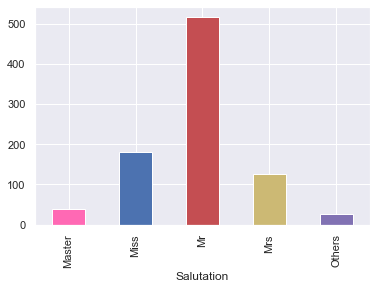

In [15]:
# Distribution
colors_sex = ['#ff69b4', 'b', 'r', 'y', 'm', 'c']
df.groupby('Salutation').size().plot(kind='bar', color=colors_sex)

<AxesSubplot:title={'center':'Age'}, xlabel='Salutation'>

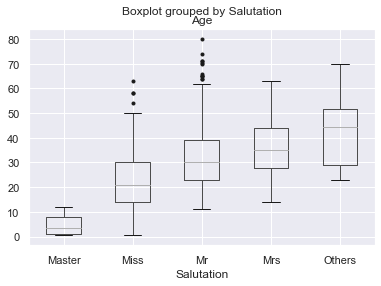

In [16]:
df.boxplot(column='Age', by = 'Salutation', sym='k.')

## Features Children and Female

In [17]:
# Specific features for Children and Female since there are more survivors
df['Children']   = df['Age'].map(lambda x: 1 if x < 6.0 else 0)
df['Female']     = df['Sex'].map(lambda x: 1 if x == "female" else 0)

## Feature AgeGroup

In [18]:
# Group ages to simplify machine learning algorithms.  0: 0-5, 1: 6-10, 2: 11-15, 3: 16-59 and 4: 60-80
df['AgeGroup'] = np.nan
df.loc[(df.Age<6),'AgeGroup'] = 0
df.loc[(df.Age>=6) & (df.Age < 11),'AgeGroup'] = 1
df.loc[(df.Age>=11) & (df.Age < 16),'AgeGroup'] = 2
df.loc[(df.Age>=16) & (df.Age < 60),'AgeGroup'] = 3
df.loc[(df.Age>=60),'AgeGroup'] = 4

## Feature Deck
Only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck.

In [19]:
def substrings_in_string(big_string, substrings):
    if type(big_string) == float:
        if np.isnan(big_string):
            return 'X'
    for substring in substrings:
        if substring in big_string:
            return substring[0::]
    print(big_string)
    return 'X'
 
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

## Feature FarePerPerson

This feature is created from two previous features: Fare and FamilySize.

In [20]:
df['FarePerPerson']= df['Fare'] / (df['FamilySize'] + 1)

## Feature AgeClass

Since age and class are both numbers we can just multiply them and get a new feature.


In [21]:
df['AgeClass']=df['Age']*df['Pclass']

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

©  Carlos A. Iglesias, Universidad Politécnica de Madrid.